### Importamos todas las librerias a usar

In [14]:
import math
import scipy.stats as st
from IPython.display import display, Markdown, Latex
import pandas as pd
import matplotlib.pyplot as plt
import IPython.core.display as di
import numpy as np
import matplotlib.image as mpimg


# Regresion Lineal
## Con Intervalo
Suponga que en un estudio sobre aceite de algodon se a observado las vanariables:
* Y = Densidad de aceite de algodón (gramos / litro)
* X = Temperatura (grados centígrados)

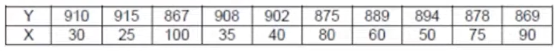

a) Estime el modelo de regresion lineal.

b) Halle el intervalo de confianza a un 5% de significación para X=45

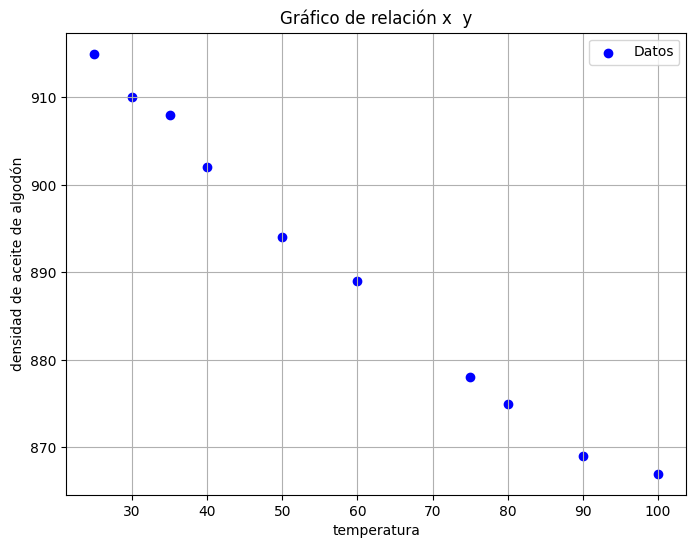

,X,Y,X*Y,X^2,Y^2
0,30,910,27300,900,828100
1,25,915,22875,625,837225
2,100,867,86700,10000,751689
3,35,908,31780,1225,824464
4,40,902,36080,1600,813604
5,80,875,70000,6400,765625
6,60,889,53340,3600,790321
7,50,894,44700,2500,799236
8,75,878,65850,5625,770884
9,90,869,78210,8100,755161


Media (X) = 58.5
Media (Y) = 890.7
Usando las Formulas:


$$\widehat{\beta}_{1}=\frac{n\sum XY-\sum X\sum Y}{n\sum X^{2}-(\sum X)^{2}}$$

$$\widehat{\beta}_{0}=\frac{\sum Y-\widehat{\beta}_{1}\sum X}n$$


PASO 1
B1 = -42245 / 63525  = -0.665

PASO 2
B0 = 9296.025 / 10  = 929.6025

Ecuacion de Pronostico
Y = 929.6025 -0.665 X
B1 = Cuando el temperatura aumenta en 1 la densidad de aceite de algodón en promedio
     disminuye 0.665
B0 = Cuando el temperatura sea 0 o minimo la densidad de aceite de algodón en promedio
     será de 929.6025 

Halle el intervalo de confianza a un 5% de significación para X=45
Respuesta Pregunta = 899.6775

SC(X) = 40575 - 34222.5 = 6352.5
CME = 7936309 - 10 * 793346.4900000001 - -0.665 * 516835 - 10 * 52105.950000000004 / 9 = 3.8675
T-Student: T(1-a/2,n-2) = 2.306

- Intervalo de Confianza
Limite Inferior: 898.0506556327897 
Limite Superior: 901.3043443672103


In [8]:
# Opciones = "Prediccion" "Confianza" "Ambos" / "nada"
tipoIntervalo = "Confianza"

# Datos
a = 0.05
pregunta = "Halle el intervalo de confianza a un 5% de significación para X=45"
VariableX = 45
x = [30,25,100,35,40,80,60,50,75,90]
TextX = "temperatura"
y = [910,915,867,908,902,875,889,894,878,869]
TextY = "densidad de aceite de algodón"
n = len(x)

#------------------------------------------------
# Creacion y muestra en pantalla del grafico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Datos')
# Personalizar el gráfico
plt.title('Gráfico de relación x  y')
plt.xlabel(TextX)
plt.ylabel(TextY)
plt.grid(True)
plt.legend()
# Mostrar el gráfico
plt.show()
#-----------------------------------------------

promedio_x = sum(x)/n
promedio_y = sum(y)/n

# Calculo x*y | x^2 | y^2
xy=[]
x2=[]
y2=[]
for posC,numero in enumerate(x):
    valorXY = numero*y[posC]
    valorX2 = numero**2
    valorY2 = y[posC]**2
    xy.append(valorXY)
    x2.append(valorX2)
    y2.append(valorY2)

# Creando Tabla
Tabla1 = {
    'X': x+[sum(x)],
    'Y': y+[sum(y)],
    'X*Y': xy+[sum(xy)],
    'X^2': x2+[sum(x2)],   
    'Y^2': y2+[sum(y2)]  
}
df = pd.DataFrame(Tabla1)
df = df.rename(index={n:'TOTAL'})

# Mostrar el DataFrame
display(df)

print("Media (X) =",promedio_x)
print("Media (Y) =",promedio_y)

# CALCULO DE COEFICIENTES PRACTICO
print("Usando las Formulas:")
display(di.Markdown("$$\widehat{\\beta}_{1}=\\frac{n\sum XY-\sum X\sum Y}{n\sum X^{2}-(\sum X)^{2}}$$"))
display(di.Markdown("$$\widehat{\\beta}_{0}=\\frac{\sum Y-\widehat{\\beta}_{1}\sum X}n$$"))
# PASO 1.
NuB1 = (n*sum(xy))-(sum(x)*sum(y))
DeNB1 = (n*sum(x2))-(sum(x)**2)
B1 = round(NuB1/DeNB1,4)
print("\nPASO 1\nB1 =",NuB1,"/",DeNB1," =",B1)

# PASO 2.
NuB0 = (sum(y)-B1*sum(x))
B0 = round(NuB0/n,4)
print("\nPASO 2\nB0 =",NuB0,"/",n," =",B0)

# Ecuacion de Pronostico:
print("\nEcuacion de Pronostico\nY =",B0,B1,"X")
estado = ""
if B1<0:
    estado="disminuye"
else:
    estado="aumenta"

print("B1 = Cuando el",TextX,"aumenta en 1 la",TextY,"en promedio\n    ",estado,abs(B1))
print("B0 = Cuando el",TextX,"sea 0 o minimo la",TextY,"en promedio\n     será de",abs(B0),"\n")

# Calculo de pregunta reemplazando la variable
PronosticoXy = B0+(B1*VariableX)
print(pregunta)
print("Respuesta Pregunta =",PronosticoXy)


# -----------------------------------------------------
#           Calculo de Intervalos

# Hallar la sumatoria SC(X)
ScX = sum(x2) - n * promedio_x**2

# Hallamos CME
p_CME = round(((sum(y2)-n*promedio_y**2)-B1*(sum(xy)-n*promedio_x*promedio_y))/(n-1),4)

# Calculamos T Student
gl= n-2
T = round(st.t.ppf(1-(a/2),df=gl),4)

if tipoIntervalo == "Ambos":
    print("\nSC(X) =",sum(x2),"-",n * promedio_x**2,"=",ScX)
    print("CME =", sum(y2), "-", n, "*", promedio_y**2, "-", B1, "*", sum(xy), "-", n, "*", (promedio_x * promedio_y), "/", n - 1, "=", p_CME)
    print("T-Student: T(1-a/2,n-2) =",T)
    # Para El Intervalo de Prediccion:
    Ip_Linf = PronosticoXy - T * math.sqrt(p_CME*(1+1/n+(VariableX-promedio_x)**2/ScX))
    Ip_LiSup = PronosticoXy + T * math.sqrt(p_CME*(1+1/n+(VariableX-promedio_x)**2/ScX))
    print("\n- Intervalo de Prediccion\nLimite Inferior:",Ip_Linf,"\nLimite Superior:",Ip_LiSup)
    # Para el Intervalo de Confianza:
    Ic_Linf = PronosticoXy - T * math.sqrt(p_CME*(1/n+(VariableX-promedio_x)**2/ScX))
    Ic_LiSup = PronosticoXy + T * math.sqrt(p_CME*(1/n+(VariableX-promedio_x)**2/ScX))
    print("\n- Intervalo de Confianza\nLimite Inferior:",Ic_Linf,"\nLimite Superior:",Ic_LiSup)
elif tipoIntervalo == "Prediccion":
    print("\nSC(X) =",sum(x2),"-",n * promedio_x**2,"=",ScX)
    print("CME =", sum(y2), "-", n, "*", promedio_y**2, "-", B1, "*", sum(xy), "-", n, "*", (promedio_x * promedio_y), "/", n - 1, "=", p_CME)
    print("T-Student: T(1-a/2,n-2) =",T)
    # Para El Intervalo de Prediccion:
    Ip_Linf = PronosticoXy - T * math.sqrt(p_CME*(1+1/n+(VariableX-promedio_x)**2/ScX))
    Ip_LiSup = PronosticoXy + T * math.sqrt(p_CME*(1+1/n+(VariableX-promedio_x)**2/ScX))
    print("\n- Intervalo de Prediccion\nLimite Inferior:",Ip_Linf,"\nLimite Superior:",Ip_LiSup)
elif tipoIntervalo == "Confianza":
    print("\nSC(X) =",sum(x2),"-",n * promedio_x**2,"=",ScX)
    print("CME =", sum(y2), "-", n, "*", promedio_y**2, "-", B1, "*", sum(xy), "-", n, "*", (promedio_x * promedio_y), "/", n - 1, "=", p_CME)
    print("T-Student: T(1-a/2,n-2) =",T)
    # Para el Intervalo de Confianza:
    Ic_Linf = PronosticoXy - T * math.sqrt(p_CME*(1/n+(VariableX-promedio_x)**2/ScX))
    Ic_LiSup = PronosticoXy + T * math.sqrt(p_CME*(1/n+(VariableX-promedio_x)**2/ScX))
    print("\n- Intervalo de Confianza\nLimite Inferior:",Ic_Linf,"\nLimite Superior:",Ic_LiSup)
elif tipoIntervalo=="nada":
    print("No piden Intervalos")

Conclusion:
Con un nivel de confianza del 95% se puede afirmar que para un valor de X = 45, el verdadero valor pronosticado se encontrara entre (898.05;901.3)

# Coeficiente de Correlacion
La siguiente información seleccionada al azar corresponde al número de horas que dedicaron un grupo de consultores ambientales en metodologías de línea de base para proyectos y estudios de impacto ambiental y sus honoranos profesionales, en cientos de dólares, por el trabajo realzado.

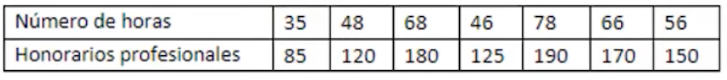

**Halle e Interprete** el coeficiente de Correlación

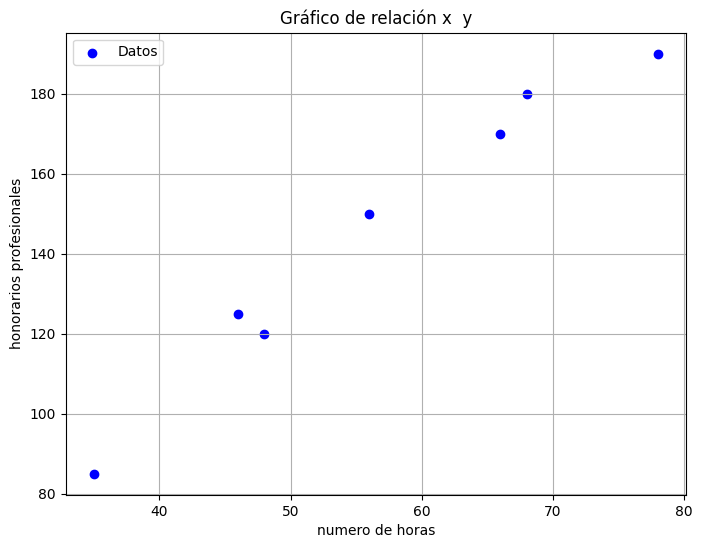

,X,Y,Y*X,X^2,Y^2
0,35,85,2975,1225,7225
1,48,120,5760,2304,14400
2,68,180,12240,4624,32400
3,46,125,5750,2116,15625
4,78,190,14820,6084,36100
5,66,170,11220,4356,28900
6,56,150,8400,3136,22500
TOTAL,397,1020,61165,23845,157150



Coeficiente de Correlacion (r)


$$r =\frac{23215}{\sqrt{9306} \cdot \sqrt{59650}}=0.985$$

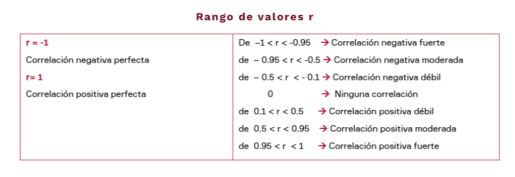


PASO 1


$$\widehat{\beta}_{1}=\frac{n\sum XY-\sum X\sum Y}{n\sum X^{2}-(\sum X)^{2}}$$

$$\widehat{\beta}_{1}=\frac{428155-404940}{166915-157609}=2.4946$$


PASO 2


$$\widehat{\beta}_{0}=\frac{\sum Y-\widehat{\beta}_{1}\sum X}n$$

$$\widehat{\beta}_{0}=\frac{1020-990.3562000000001}7=4.2348$$


Ecuacion de Pronostico
Y = 4.2348 + 2.4946 X


,Yi=B0+B1X,SCR,SCE
0,91.5458,2934.2217,42.8475
1,123.9756,472.5692,15.8054
2,173.8676,792.6107,37.6063
3,118.9864,714.3783,36.1634
4,198.8136,2819.5402,77.6795
5,168.8784,536.5775,1.2580
6,143.9324,3.1750,36.8158
TOTAL,1019.9998,8273.0726,248.1759



SCT = 8273.0726 + 248.1759  = 8521.2485

Coeficiente de Determinacion (R^2):
 8273.07 / 8521.25 = 0.9709 -> 97.09 %


In [15]:
# Datos
#pregunta= "¿Cuánto en Promedio recibirá de propina un moso que se ha demorado en atender 3.5 minutos?"
#VariableX = 3.5
x = [35,48,68,46,78,66,56]
TextX = "numero de horas"
y = [85,120,180,125,190,170,150]
TextY = "honorarios profesionales"
n = len(x)

#------------------------------------------------
# Creacion y muestra en pantalla del grafico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Datos')
# Personalizar el gráfico
plt.title('Gráfico de relación x  y')
plt.xlabel(TextX)
plt.ylabel(TextY)
plt.grid(True)
plt.legend()
# Mostrar el gráfico
plt.show()
#-----------------------------------------------

# Calculo x*y | x^2 | y^2
xy=[]
x2=[]
y2=[]
for posC,numero in enumerate(x):
    valorXY = numero*y[posC]
    valorX2 = numero**2
    valorY2 = y[posC]**2
    xy.append(valorXY)
    x2.append(valorX2)
    y2.append(valorY2)


#-----------Crear un DataFrame -------------
Tabla1 = {
    'X': x+[sum(x)],
    'Y': y+[sum(y)],
    'Y*X': xy+[sum(xy)],
    'X^2': x2+[sum(x2)],   
    'Y^2': y2+[sum(y2)]
}
df = pd.DataFrame(Tabla1)
df = df.rename(index={n:'TOTAL'})
# Mostrar el DataFrame
display(df)

# Calculo de coeficiente de Correlacion
print("\nCoeficiente de Correlacion (r)")
r = round((n * sum(xy) - sum(x) * sum(y)) / (math.sqrt(n * sum(x2) - (sum(x) ** 2)) * math.sqrt(n * sum(y2) - (sum(y) ** 2))),3)
display(di.Markdown(fr"$$r =\frac{{{n * sum(xy) - sum(x) * sum(y)}}}{{\sqrt{{{n * sum(x2) - (sum(x) ** 2)}}} \cdot \sqrt{{{n * sum(y2) - (sum(y) ** 2)}}}}}={r}$$"))

# Cargar la imagen
imagen = mpimg.imread("../Images/rangoValoresR.png")
# Mostrar la imagen
plt.imshow(imagen)
plt.axis('off')  # Desactivar los ejes
plt.show()

#-----------------------------------------------------------------
# Calculo de coeficiente de Determinacion -> Solo aplica para Regresion Lineal Simple
# CfD = round(r**2,4)
# print("Coeficiente de Determinacion Forma Simple =",CfD," ->",CfD*100,"%")
#----------------------------------------------------------
# Calculo de coeficiente de Determinacion -> Como debe de ser

# CALCULO DE COEFICIENTES PRACTICO
# PASO 1.
NuB1 = (n*sum(xy))-(sum(x)*sum(y))
DeNB1 = (n*sum(x2))-(sum(x)**2)
B1 = round(NuB1/DeNB1,4)
print("\nPASO 1")
display(di.Markdown("$$\widehat{\\beta}_{1}=\\frac{n\sum XY-\sum X\sum Y}{n\sum X^{2}-(\sum X)^{2}}$$"))
display(di.Markdown(fr"$$\widehat{{\beta}}_{{1}}=\frac{{{(n*sum(xy))}-{(sum(x)*sum(y))}}}{{{(n*sum(x2))}-{(sum(x)**2)}}}={B1}$$"))

# PASO 2.
NuB0 = (sum(y)-B1*sum(x))
B0 = round(NuB0/n,4)
print("\nPASO 2")
display(di.Markdown("$$\widehat{\\beta}_{0}=\\frac{\sum Y-\widehat{\\beta}_{1}\sum X}n$$"))
display(di.Markdown(fr"$$\widehat{{\beta}}_{{0}}=\frac{{{(sum(y))}-{B1*sum(x)}}}{n}={B0}$$"))

# Ecuacion de Pronostico:
print("\nEcuacion de Pronostico\nY =",B0,"+",B1,"X")

# Calculamos Y=B0+B1X
yBoB1X = []
for posC,numero in enumerate(x):
    valor = round(B0+B1*numero,4)
    yBoB1X.append(valor)
promedioyBoB1X = sum(yBoB1X)/n

# Calculamos SCR
Scr = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-promedioyBoB1X)**2,4)
    Scr.append(valor)

# Calculamos SCE
Sce = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-y[posC])**2,4)
    Sce.append(valor)

# Crear un DataFrame 
Tabla2 = {
    'Yi=B0+B1X': yBoB1X+[sum(yBoB1X)],
    'SCR': Scr+[sum(Scr)],   
    'SCE': Sce+[sum(Sce)]  
}
tb2 = pd.DataFrame(Tabla2)
tb2 = tb2.rename(index={n:'TOTAL'})
# Mostrar el DataFrame
display(tb2)

# Calculamos SCT
Sct = round(sum(Scr)+sum(Sce),4)
print("\nSCT =",sum(Scr),"+",sum(Sce)," =",Sct)

# Calculamos R^2
r2 = sum(Scr)/Sct
print("\nCoeficiente de Determinacion (R^2):\n",round(sum(Scr),2),"/",round(Sct,2),"=",round(r2,4),"->",round(r2,4)*100,"%")

### Interpretacion de la correlacion:
Existe una correlación intensa entre el número de horas (X) y los honorarios de los profesionales (Y) del grupo de consultores ambientales en metodologías de línea de base para proyectos y estudios de impacto ambiental, y la relación es de manera directa, es decir mientras más horas realice un consultor mayor serán sus honorarios.

# Regresion Lineal Multiple
Se desea estudiar el efecto de la temperatura ambiente promedio diario en °F (X1). y la cantidad de aislante utilizado en un desván medido en pulgadas de grosor (X2) sobre el consumo mensual de petróleo, en galones. para calefacción de casas (Y). Para el efecto se ha tomado una muestra aleatona de 15 casas cuyos datos medidos se reportan a continuación:

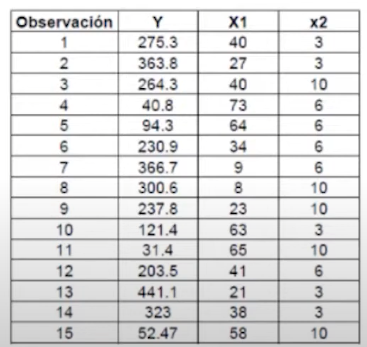

Desarrolle el Modelo de Analisis de Regresion Lineal Multiple

,X1,X2,Y,X1*Y,X2*Y,X1*X2,X1^2,X2^2
0,40,3,275.30,11012.00,825.9,120,1600,9
1,27,3,363.80,9822.60,1091.4,81,729,9
2,40,10,264.30,10572.00,2643.0,400,1600,100
3,73,6,40.80,2978.40,244.8,438,5329,36
4,64,6,94.30,6035.20,565.8,384,4096,36
5,34,6,230.90,7850.60,1385.4,204,1156,36
6,9,6,366.70,3300.30,2200.2,54,81,36
7,8,10,300.60,2404.80,3006.0,80,64,100
8,23,10,237.80,5469.40,2378.0,230,529,100
9,63,3,121.40,7648.20,364.2,189,3969,9


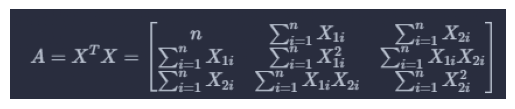

Matriz:
[[   15   604    95]
 [  604 30308  3833]
 [   95  3833   725]]

Matriz inversa:
[[ 6.57467012e-01 -6.66052969e-03 -5.09373184e-02]
 [-6.66052969e-03  1.67043719e-04 -1.03837987e-05]
 [-5.09373184e-02 -1.03837987e-05  8.10875359e-03]]

Matriz 3x1:
[[  3347.37]
 [102058.36]
 [ 19056.7 ]]

Producto de matrices:
[[550.32541977]
 [ -5.44493021]
 [-17.03972055]]

Modelo de Regresion Estimado
Y =  550.3254197713856 + -5.444930205071 X1 + -17.039720554819905 X2


,Yi=B0+B1X+B2X,SCR,SCE
0,281.4090,3393.1782,37.3199
1,352.1931,16650.0553,134.7201
2,162.1310,3724.2955,10438.5046
3,50.6072,29773.7809,96.1812
4,99.6116,15263.7146,28.2131
5,262.9595,1584.1589,1027.8115
6,399.0827,30949.4977,1048.6393
7,336.3688,12816.6837,1279.4071
8,254.6948,994.5693,285.4343
9,156.1757,4486.6294,1209.3493



SCT = 214728.84029999995 + 20311.232700000004  = 235040.073

Coeficiente de Determinacion (r^2):
 214728.84 / 235040.07 = 0.9136 -> 91.36 %
El 81.1% de la variabilidad de la variable Resistencia es explicado por el modelo de regresión ajustado


In [17]:
# Datos
a = 0.05 # -> General
y = [275.3,363.8,264.3,40.8,94.3,230.9,366.7,300.6,237.8,121.4,31.4,203.5,441.1,323,52.47]
X1 = [40,27,40,73,64,34,9,8,23,63,65,41,21,38,58]
X2 = [3,3,10,6,6,6,6,10,10,3,10,6,3,3,10]
n = len(y)

# Calculo de Sumas X1/X2/Y/X1*Y/X2*Y/X1*X2/X1^2/X2^2
X1xY=[]
X2xY=[]
X1xX2=[]
X1_2 = []
X2_2 = []
for posC,numero in enumerate(y):
    valorX1xY = X1[posC]*numero
    valorX2xY = X2[posC]*numero
    valorX1xX2 = X1[posC]*X2[posC]
    valorX1_2 = X1[posC]**2
    valorX2_2 = X2[posC]**2
    X1xY.append(valorX1xY)
    X2xY.append(valorX2xY)
    X1xX2.append(valorX1xX2)
    X1_2.append(valorX1_2)
    X2_2.append(valorX2_2)

# ---------Crear una Tabla------------ 
Tabla1 = {
    'X1': X1+[sum(X1)],
    'X2': X2+[sum(X2)],   
    'Y': y+[sum(y)],
    'X1*Y': X1xY+[sum(X1xY)],
    'X2*Y': X2xY+[sum(X2xY)],
    'X1*X2': X1xX2+[sum(X1xX2)],
    'X1^2': X1_2+[sum(X1_2)],
    'X2^2': X2_2+[sum(X2_2)] 
}
tb1 = pd.DataFrame(Tabla1)
tb1 = tb1.rename(index={n:'SUMA'})
# ---------Mostrar el DataFrame-----
display(tb1)

# Cargar la imagen
imagen = mpimg.imread("../Images/matrizRegresionMultiple.png")
# Mostrar la imagen
plt.imshow(imagen)
plt.axis('off')  # Desactivar los ejes
plt.show()

# Definir una matriz
matriz = np.array([[  n,     sum(X1),    sum(X2)],
                   [sum(X1),sum(X1_2),sum(X1xX2)],
                   [sum(X2),sum(X1xX2),sum(X2_2)]])

# Definir la segunda matriz (3x1)
matriz_3x1 = np.array([[sum( y )],
                       [sum(X1xY)],
                       [sum(X2xY)]])

# Calcular la inversa de la matriz
matriz_inversa = np.linalg.inv(matriz)

# Calcular el producto de matrices
producto = np.dot(matriz_inversa,matriz_3x1)

print("Matriz:")
print(matriz)
print("\nMatriz inversa:")
print(matriz_inversa)

print("\nMatriz 3x1:")
print(matriz_3x1)
print("\nProducto de matrices:")
print(producto)

# Asignando Variables
B0 = producto[0][0]
B1 = producto[1][0]
B2 = producto[2][0]
print("\nModelo de Regresion Estimado")
print("Y = ",B0,"+",B1,"X1 +",B2,"X2")

# Calculamos Y=B0+B1X
yBoB1X = []
for posC,numero in enumerate(X1):
    valor = round(B0+B1*numero+B2*X2[posC],4)
    yBoB1X.append(valor)
promedioyBoB1X = sum(yBoB1X)/n

# Calculamos SCR
Scr = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-promedioyBoB1X)**2,4)
    Scr.append(valor)

# Calculamos SCE
Sce = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-y[posC])**2,4)
    Sce.append(valor)

# Crear un DataFrame 
Tabla2 = {
    'Yi=B0+B1X+B2X': yBoB1X+[sum(yBoB1X)],
    'SCR': Scr+[sum(Scr)],   
    'SCE': Sce+[sum(Sce)]  
}
tb2 = pd.DataFrame(Tabla2)
tb2 = tb2.rename(index={n:'TOTAL'})
# Mostrar el DataFrame
display(tb2)

# Calculamos SCT
Sct = round(sum(Scr)+sum(Sce),4)
print("\nSCT =",sum(Scr),"+",sum(Sce)," =",Sct)

# Calculamos R^2
r2 = sum(Scr)/Sct
print("\nCoeficiente de Determinacion (r^2):\n",round(sum(Scr),2),"/",round(Sct,2),"=",round(r2,4),"->",round(r2,4)*100,"%")
print("El 81.1% de la variabilidad de la variable Resistencia es explicado por el modelo de regresión ajustado")